In [12]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib.ticker import LinearLocator
# from scipy.constants import hbar
from scipy.integrate import quad

In [13]:
pi = np.pi
h = 1
hbar = h/(2*pi)
d = R = 1

In [26]:
def psi(x) :
    return np.exp(-d*abs(x + 0.5*R)) + np.exp(-d*abs(x - 0.5*R))

In [27]:
def fun(u, x, p) :
    return psi(x + u/2) * np.conjugate(psi(x - u/2)) * np.exp(-1j*p*u/hbar)

def Wigner(x, p) :
    W = np.zeros((len(x), len(p)))
    for i in range(len(x)) :
        for j in range(len(p)) :
            W[i][j] = quad(fun, -np.inf, np.inf, args=(x[i], p[j]))[0]
    return W

# def Wigner(x, p) :
#     return quad(fun, -np.inf, np.inf, args=(x[0], p[0]))

In [29]:
# Make data.
x = np.arange(-2, 2, 0.1)
p = np.arange(-0.2, 0.2, 0.1)

print("total length = ", len(x)*len(p))

W = Wigner(x, p)
W = W.T

total length =  160


In [30]:
print(max([max(col) for col in W]))
print(min([min(col) for col in W]))

6.94303552937154
-0.08073132772648842


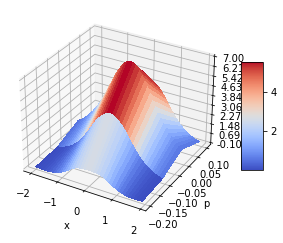

In [31]:
X, P = np.meshgrid(x, p)

# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(X, P, W, cmap=cm.coolwarm,
                    linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.1, 7)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel("x")
ax.set_ylabel("p")
ax.set_zlabel("W")

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()